In [17]:
# HW2

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [188]:
#https://ithelp.ithome.com.tw/articles/10227010?sc=rss.iron

columns = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"]

df_adult_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                             names=columns,
                             sep=r'\s*,\s*',
                             na_values="?",
                             engine='python',
                             header=None)
df_adult_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                            names=columns,
                            sep=r'\s*,\s*',
                            na_values="?",
                            engine='python',
                            header=None)
df_adult_train.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
df_adult_test.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [4]:
df_adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# summarize the class distribution
target = df_adult_train.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class: %s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class: <=50K, Count=24720, Percentage=75.919%
Class: >50K, Count=7841, Percentage=24.081%


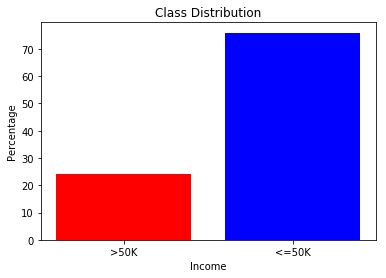

In [6]:
income = ['>50K', '<=50K']
distribution = [24.081, 75.919]
x = np.arange(len(income))
plt.bar(x, distribution, color=['red', 'blue'])
plt.xticks(x, income)
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.title('Class Distribution')
plt.show()

In [7]:
quantitative = [f for f in df_adult_train.columns if df_adult_train.dtypes[f] != 'object']
qualitative = [f for f in df_adult_train.columns if df_adult_train.dtypes[f] == 'object']

In [8]:
quantitative_count = len(quantitative)
quantitative_count

6

In [9]:
qualitative_count = len(qualitative)
qualitative_count

9

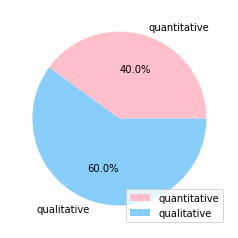

In [10]:
# defining labels
activities = ['quantitative', 'qualitative']
  
# portion covered by each label
slices = [quantitative_count, qualitative_count]
  
# color for each label
colors = ['pink', 'lightskyblue']
  
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, autopct = '%1.1f%%')
  
# plotting legend
plt.legend(loc='lower right')
  
# showing the plot
plt.show()

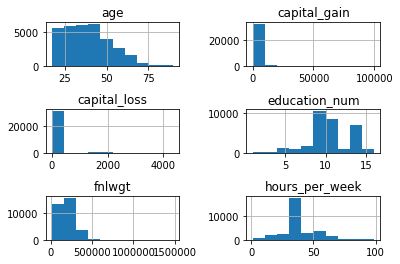

In [11]:
num_ix = df_adult_train.select_dtypes(include=['int64']).columns

# select a subset of the dataframe with the chosen columns
subset = df_adult_train[num_ix]

# create a histogram plot of each numeric variable
subset.hist()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)
plt.show()

In [12]:
#running a loop of value_counts of each column to find out unique values. 
for c in df_adult_train.columns:
    print ("---- %s ---" % c)
    print (df_adult_train[c].value_counts())

---- age ---
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
---- workclass ---
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---- fnlwgt ---
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
---- education ---
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: educat

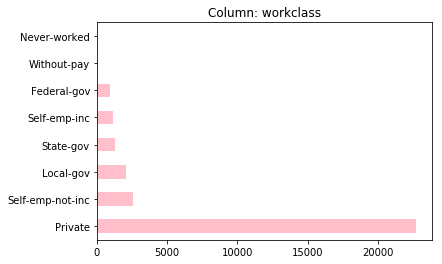

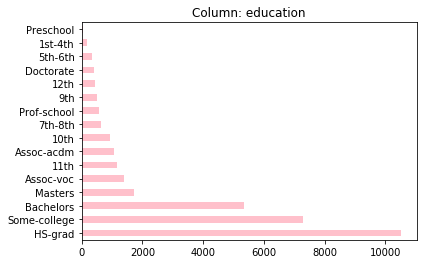

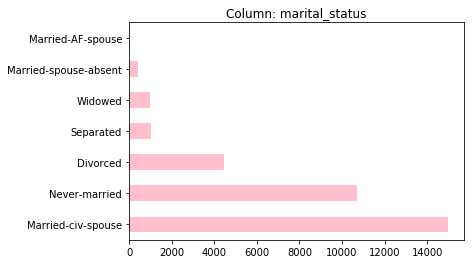

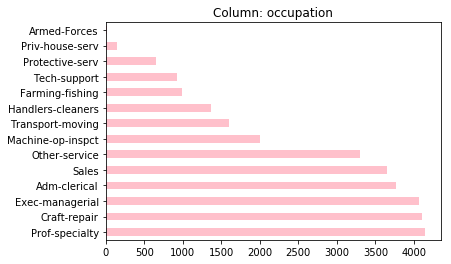

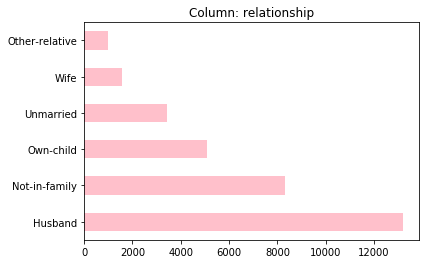

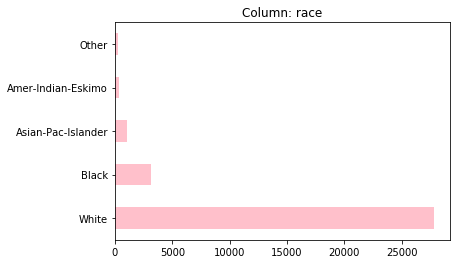

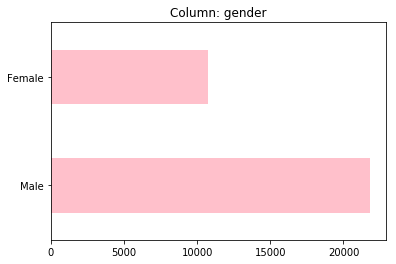

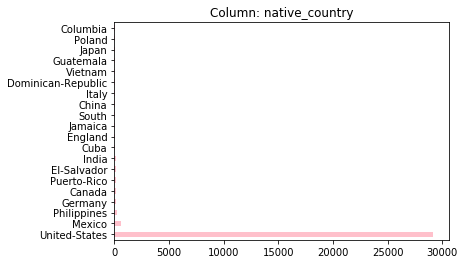

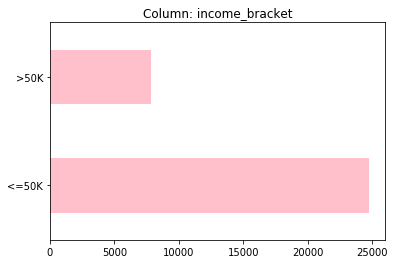

In [13]:
for colname in qualitative:
    plt.title('Column: ' + colname)

    (df_adult_train[colname]
         .value_counts()
         .head(20)
         .plot(kind='barh', color=colors[0]))

    plt.show()

In [ ]:
#HW3

In [52]:
# replace "?" to NaN
df_adult_train.replace("?", np.nan, inplace = True)
df_adult_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
missing_data = df_adult_train.isnull()
missing_data.sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64

In [54]:
missing_col = []
for column in missing_data.columns.values.tolist():
    if(missing_data[column].sum() > 0):
        print("Column: ",column)
        print("Missing Data: {} ({:.2f}%)".format(missing_data[column].sum(), (missing_data[column].sum() * 100/ len(df_adult_train))))
        print("Data Type: ",df_adult_train[column].dtypes)
        print("")
        missing_col.append(column)

Column:  workclass
Missing Data: 1836 (5.64%)
Data Type:  object

Column:  occupation
Missing Data: 1843 (5.66%)
Data Type:  object

Column:  native_country
Missing Data: 583 (1.79%)
Data Type:  object



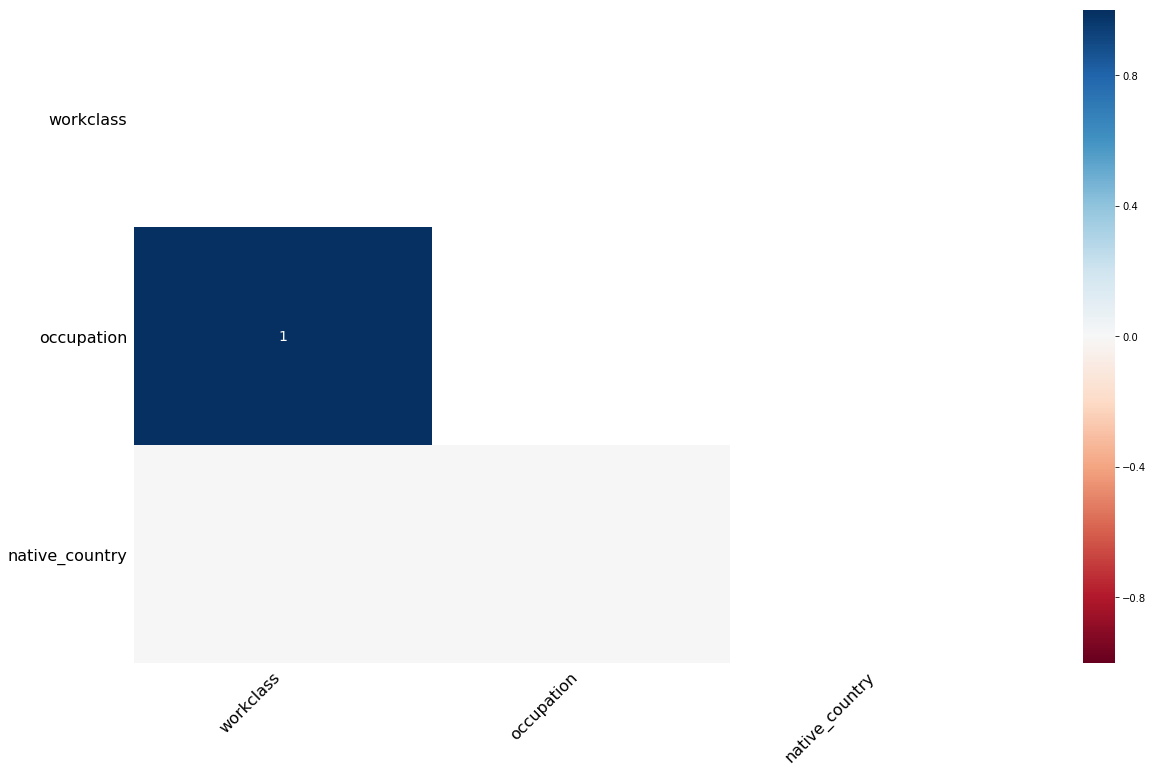

In [55]:
msno.heatmap(df_adult_train)

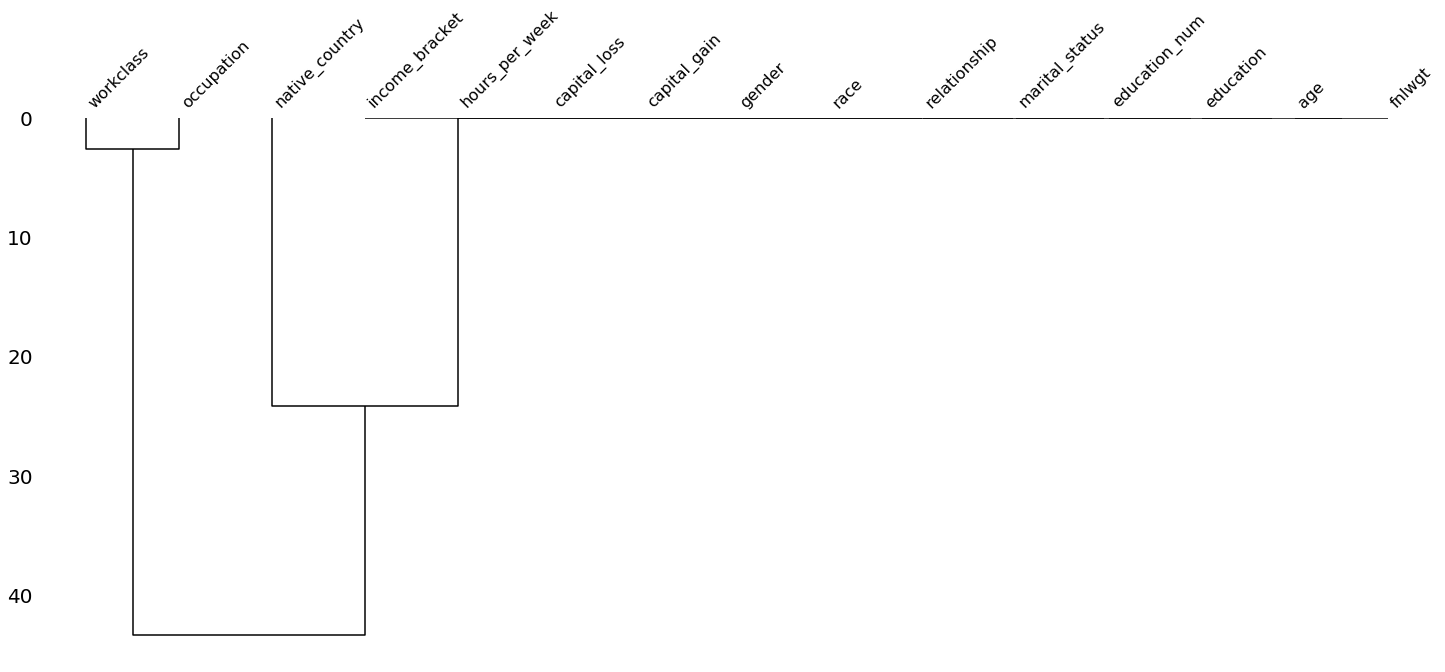

In [56]:
msno.dendrogram(df_adult_train)

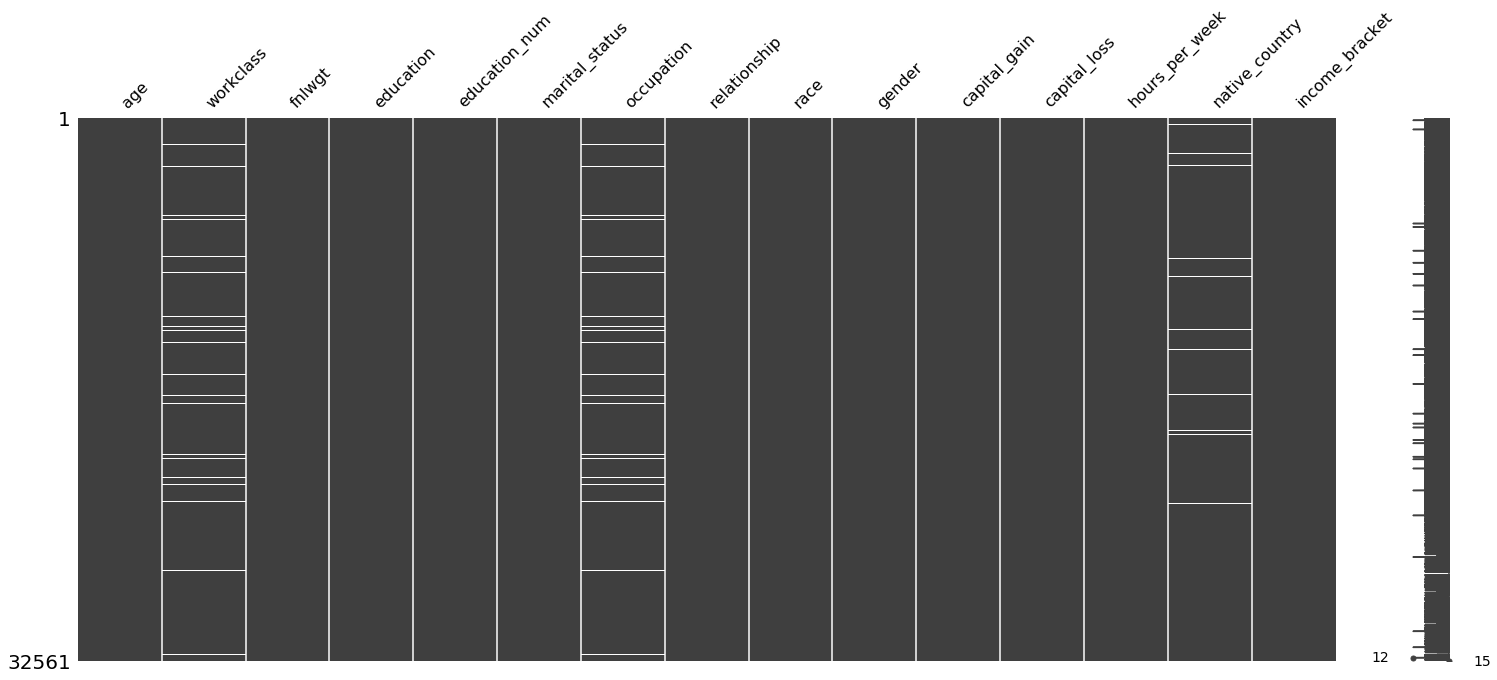

In [57]:
msno.matrix(df_adult_train.sort_values('income_bracket'))

In [59]:
missing_survey = df_adult_train[df_adult_train['native_country'].isnull()]
complete_survey = df_adult_train[~df_adult_train['native_country'].isnull()]

complete_survey.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_bracket
count,31978.000000,3.197800e+04,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1.897141e+05,10.071236,1064.360623,86.739352,40.417850,0.240634
std,13.662085,1.057255e+05,2.560667,7298.596271,401.594301,12.345285,0.427475
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176202e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.373790e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [60]:
missing_survey.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_bracket
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864,0.250429
std,12.404833,95443.511398,3.123484,11137.277432,471.230665,12.427774,0.433632
min,17.000000,22245.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,133095.500000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,182567.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,46.000000,227144.000000,13.000000,0.000000,0.000000,45.000000,0.500000
max,90.000000,647882.000000,16.000000,99999.000000,3004.000000,99.000000,1.000000


In [ ]:
###

In [189]:
df_adult_train = df_adult_train.drop(["fnlwgt","education","capital_gain","capital_loss"], axis = 1)

In [190]:
df_adult_train.income_bracket.replace(('<=50K', '>50K'),(0,1), inplace=True)

In [191]:
colname = []

for i in df_adult_train.columns:
    if(df_adult_train[i].dtype == "object"):
        colname.append(i)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [ ]:
### Creating a new category 

In [195]:
train = df_adult_train.copy()

In [196]:
#function to create density plot
def impute_checker (feature, imputed_dataset, title):
    train[feature].plot(kind='kde', c='black')
    imputed_dataset[feature].plot(kind='kde', style = "--", c= '#66c2a5')
    labels = ['Original df', 'Imputed df']
    plt.legend(labels)
    plt.xlabel(feature)
    plt.title(title)
    plt.show()

In [201]:
# Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

for Columns in ['workclass','occupation','native_country']:
    impute_nan_create_category(train, Columns)

In [202]:
le = LabelEncoder()

for i in colname:
    train[i] = le.fit_transform(train[i])
    
    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    print("Feature :", i)
    print("Mapping :", le_name_mapping)

Feature : workclass
Mapping : [('Federal-gov', 0), ('Local-gov', 1), ('Never-worked', 2), ('Private', 3), ('Self-emp-inc', 4), ('Self-emp-not-inc', 5), ('State-gov', 6), ('Unknown', 7), ('Without-pay', 8)]
Feature : marital_status
Mapping : [('Divorced', 0), ('Married-AF-spouse', 1), ('Married-civ-spouse', 2), ('Married-spouse-absent', 3), ('Never-married', 4), ('Separated', 5), ('Widowed', 6)]
Feature : occupation
Mapping : [('Adm-clerical', 0), ('Armed-Forces', 1), ('Craft-repair', 2), ('Exec-managerial', 3), ('Farming-fishing', 4), ('Handlers-cleaners', 5), ('Machine-op-inspct', 6), ('Other-service', 7), ('Priv-house-serv', 8), ('Prof-specialty', 9), ('Protective-serv', 10), ('Sales', 11), ('Tech-support', 12), ('Transport-moving', 13), ('Unknown', 14)]
Feature : relationship
Mapping : [('Husband', 0), ('Not-in-family', 1), ('Other-relative', 2), ('Own-child', 3), ('Unmarried', 4), ('Wife', 5)]
Feature : race
Mapping : [('Amer-Indian-Eskimo', 0), ('Asian-Pac-Islander', 1), ('Black',

In [203]:
train["workclass"].replace(7, np.nan, inplace=True)
train["occupation"].replace(14, np.nan, inplace=True)
train["native_country"].replace(39, np.nan, inplace=True)

In [192]:
create_train = df_adult_train.copy()

In [193]:
# Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

for Columns in ['workclass','occupation','native_country']:
    impute_nan_create_category(create_train, Columns)

In [194]:
le = LabelEncoder()
for i in colname:
    create_train[i] = le.fit_transform(create_train[i])
    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    print("Feature :", i)
    print("Mapping :", le_name_mapping)

Feature : workclass
Mapping : [('Federal-gov', 0), ('Local-gov', 1), ('Never-worked', 2), ('Private', 3), ('Self-emp-inc', 4), ('Self-emp-not-inc', 5), ('State-gov', 6), ('Unknown', 7), ('Without-pay', 8)]
Feature : marital_status
Mapping : [('Divorced', 0), ('Married-AF-spouse', 1), ('Married-civ-spouse', 2), ('Married-spouse-absent', 3), ('Never-married', 4), ('Separated', 5), ('Widowed', 6)]
Feature : occupation
Mapping : [('Adm-clerical', 0), ('Armed-Forces', 1), ('Craft-repair', 2), ('Exec-managerial', 3), ('Farming-fishing', 4), ('Handlers-cleaners', 5), ('Machine-op-inspct', 6), ('Other-service', 7), ('Priv-house-serv', 8), ('Prof-specialty', 9), ('Protective-serv', 10), ('Sales', 11), ('Tech-support', 12), ('Transport-moving', 13), ('Unknown', 14)]
Feature : relationship
Mapping : [('Husband', 0), ('Not-in-family', 1), ('Other-relative', 2), ('Own-child', 3), ('Unmarried', 4), ('Wife', 5)]
Feature : race
Mapping : [('Amer-Indian-Eskimo', 0), ('Asian-Pac-Islander', 1), ('Black',

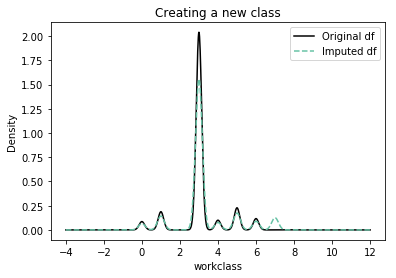

In [208]:
#creating a new class appears to work better 
impute_checker('workclass', create_train, 'Creating a new class')

In [206]:
#creating a new class incareses the variance in this feature
create_train['workclass'].var(), train['workclass'].var()

(2.0382100988750618, 1.3025791283407606)

In [207]:
#creating a new class barely has an impact on variance
create_train['occupation'].var(), train['occupation'].var()

(18.736945309682763, 16.208670301973843)

In [ ]:
### Imputation

In [176]:
#function to create density plot
def impute_checker (feature, feature2, imputed_dataset, title):
    train[feature].plot(kind='kde', c='black')
    imputed_dataset[feature2].plot(kind='kde', style = "--", c= '#66c2a5')
    labels = ['Original df', 'Imputed df']
    plt.legend(labels)
    plt.xlabel(feature)
    plt.title(title)
    plt.show()

In [165]:
most_frequent_train = df_adult_train.copy()

In [166]:
most_frequent_train.values

array([[39, 'State-gov', 13, ..., 40, 'United-States', 0],
       [50, 'Self-emp-not-inc', 13, ..., 13, 'United-States', 0],
       [38, 'Private', 9, ..., 40, 'United-States', 0],
       ...,
       [58, 'Private', 9, ..., 40, 'United-States', 0],
       [22, 'Private', 9, ..., 20, 'United-States', 0],
       [52, 'Self-emp-inc', 9, ..., 40, 'United-States', 1]], dtype=object)

In [167]:
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(most_frequent_train.values)
imputed_data = imr.transform(most_frequent_train.values)
imputed_data

array([[39, 'State-gov', 13, ..., 40, 'United-States', 0],
       [50, 'Self-emp-not-inc', 13, ..., 13, 'United-States', 0],
       [38, 'Private', 9, ..., 40, 'United-States', 0],
       ...,
       [58, 'Private', 9, ..., 40, 'United-States', 0],
       [22, 'Private', 9, ..., 20, 'United-States', 0],
       [52, 'Self-emp-inc', 9, ..., 40, 'United-States', 1]], dtype=object)

In [168]:
most_frequent_train = pd.DataFrame(imputed_data)
most_frequent_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [169]:
colname = []

for i in most_frequent_train.columns:
    if(most_frequent_train[i].dtype == "object"):
        colname.append(i)
colname

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [170]:
le = LabelEncoder()

for i in colname:
    most_frequent_train[i] = le.fit_transform(most_frequent_train[i])
    
    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    print("Feature :", i)
    print("Mapping :", le_name_mapping)

Feature : 0
Mapping : [(17, 0), (18, 1), (19, 2), (20, 3), (21, 4), (22, 5), (23, 6), (24, 7), (25, 8), (26, 9), (27, 10), (28, 11), (29, 12), (30, 13), (31, 14), (32, 15), (33, 16), (34, 17), (35, 18), (36, 19), (37, 20), (38, 21), (39, 22), (40, 23), (41, 24), (42, 25), (43, 26), (44, 27), (45, 28), (46, 29), (47, 30), (48, 31), (49, 32), (50, 33), (51, 34), (52, 35), (53, 36), (54, 37), (55, 38), (56, 39), (57, 40), (58, 41), (59, 42), (60, 43), (61, 44), (62, 45), (63, 46), (64, 47), (65, 48), (66, 49), (67, 50), (68, 51), (69, 52), (70, 53), (71, 54), (72, 55), (73, 56), (74, 57), (75, 58), (76, 59), (77, 60), (78, 61), (79, 62), (80, 63), (81, 64), (82, 65), (83, 66), (84, 67), (85, 68), (86, 69), (87, 70), (88, 71), (90, 72)]
Feature : 1
Mapping : [('Federal-gov', 0), ('Local-gov', 1), ('Never-worked', 2), ('Private', 3), ('Self-emp-inc', 4), ('Self-emp-not-inc', 5), ('State-gov', 6), ('Without-pay', 7)]
Feature : 2
Mapping : [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 

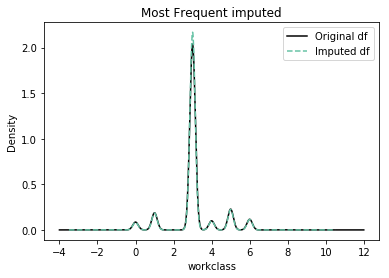

In [177]:
#after most frequent imputing the variance is only slightly lower
impute_checker('workclass', 1, most_frequent_train, 'Most Frequent imputed')

In [181]:
#most frequent imputing is as good as the mice inputing
most_frequent_train[1].var(), train['workclass'].var()

(1.2258784627031534, 1.3025791283407606)

In [183]:
#most frequent imputing barely has an impact on variance
most_frequent_train[4].var(), train['occupation'].var()

(15.782404948579742, 16.208670301973843)

In [ ]:
### MICE

In [148]:
#function to create density plot
def impute_checker (feature, imputed_dataset, title):
    train[feature].plot(kind='kde', c='black')
    imputed_dataset[feature].plot(kind='kde', style = "--", c= '#66c2a5')
    labels = ['Original df', 'Imputed df']
    plt.legend(labels)
    plt.xlabel(feature)
    plt.title(title)
    plt.show()

In [149]:
train = df_adult_train.copy()

In [150]:
colname = []

for i in mice_train.columns:
    if(train[i].dtype == "object"):
        colname.append(i)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [151]:
# Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

for Columns in ['workclass','occupation','native_country']:
    impute_nan_create_category(train, Columns)

In [152]:
le = LabelEncoder()

for i in colname:
    train[i] = le.fit_transform(train[i])
    
    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    print("Feature :", i)
    print("Mapping :", le_name_mapping)

Feature : workclass
Mapping : [('Federal-gov', 0), ('Local-gov', 1), ('Never-worked', 2), ('Private', 3), ('Self-emp-inc', 4), ('Self-emp-not-inc', 5), ('State-gov', 6), ('Unknown', 7), ('Without-pay', 8)]
Feature : marital_status
Mapping : [('Divorced', 0), ('Married-AF-spouse', 1), ('Married-civ-spouse', 2), ('Married-spouse-absent', 3), ('Never-married', 4), ('Separated', 5), ('Widowed', 6)]
Feature : occupation
Mapping : [('Adm-clerical', 0), ('Armed-Forces', 1), ('Craft-repair', 2), ('Exec-managerial', 3), ('Farming-fishing', 4), ('Handlers-cleaners', 5), ('Machine-op-inspct', 6), ('Other-service', 7), ('Priv-house-serv', 8), ('Prof-specialty', 9), ('Protective-serv', 10), ('Sales', 11), ('Tech-support', 12), ('Transport-moving', 13), ('Unknown', 14)]
Feature : relationship
Mapping : [('Husband', 0), ('Not-in-family', 1), ('Other-relative', 2), ('Own-child', 3), ('Unmarried', 4), ('Wife', 5)]
Feature : race
Mapping : [('Amer-Indian-Eskimo', 0), ('Asian-Pac-Islander', 1), ('Black',

In [153]:
train["workclass"].replace(7, np.nan, inplace=True)
train["occupation"].replace(14, np.nan, inplace=True)
train["native_country"].replace(39, np.nan, inplace=True)

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
age               32561 non-null int64
workclass         30725 non-null float64
education_num     32561 non-null int64
marital_status    32561 non-null int32
occupation        30718 non-null float64
relationship      32561 non-null int32
race              32561 non-null int32
gender            32561 non-null int32
hours_per_week    32561 non-null int64
native_country    31978 non-null float64
income_bracket    32561 non-null int64
dtypes: float64(3), int32(4), int64(4)
memory usage: 2.2 MB


In [154]:
#create a copy of the original dataset that will be mice imputed
mice_train = df_adult_train.copy()

In [155]:
colname = []

for i in mice_train.columns:
    if(mice_train[i].dtype == "object"):
        colname.append(i)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [156]:
# Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

for Columns in ['workclass','occupation','native_country']:
    impute_nan_create_category(mice_train, Columns)

In [157]:
le = LabelEncoder()
for i in colname:
    mice_train[i] = le.fit_transform(mice_train[i])
    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    print("Feature :", i)
    print("Mapping :", le_name_mapping)

Feature : workclass
Mapping : [('Federal-gov', 0), ('Local-gov', 1), ('Never-worked', 2), ('Private', 3), ('Self-emp-inc', 4), ('Self-emp-not-inc', 5), ('State-gov', 6), ('Unknown', 7), ('Without-pay', 8)]
Feature : marital_status
Mapping : [('Divorced', 0), ('Married-AF-spouse', 1), ('Married-civ-spouse', 2), ('Married-spouse-absent', 3), ('Never-married', 4), ('Separated', 5), ('Widowed', 6)]
Feature : occupation
Mapping : [('Adm-clerical', 0), ('Armed-Forces', 1), ('Craft-repair', 2), ('Exec-managerial', 3), ('Farming-fishing', 4), ('Handlers-cleaners', 5), ('Machine-op-inspct', 6), ('Other-service', 7), ('Priv-house-serv', 8), ('Prof-specialty', 9), ('Protective-serv', 10), ('Sales', 11), ('Tech-support', 12), ('Transport-moving', 13), ('Unknown', 14)]
Feature : relationship
Mapping : [('Husband', 0), ('Not-in-family', 1), ('Other-relative', 2), ('Own-child', 3), ('Unmarried', 4), ('Wife', 5)]
Feature : race
Mapping : [('Amer-Indian-Eskimo', 0), ('Asian-Pac-Islander', 1), ('Black',

In [158]:
mice_train["workclass"].replace(7, np.nan, inplace=True)
mice_train["occupation"].replace(14, np.nan, inplace=True)
mice_train["native_country"].replace(39, np.nan, inplace=True)

In [159]:
#create mice imputer
mice_imputer = IterativeImputer()

#fit and transform on train and transform test
mice_train.iloc[:, :] = (mice_imputer.fit_transform(mice_train))

In [161]:
mice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
age               32561 non-null float64
workclass         32561 non-null float64
education_num     32561 non-null float64
marital_status    32561 non-null float64
occupation        32561 non-null float64
relationship      32561 non-null float64
race              32561 non-null float64
gender            32561 non-null float64
hours_per_week    32561 non-null float64
native_country    32561 non-null float64
income_bracket    32561 non-null float64
dtypes: float64(11)
memory usage: 2.7 MB


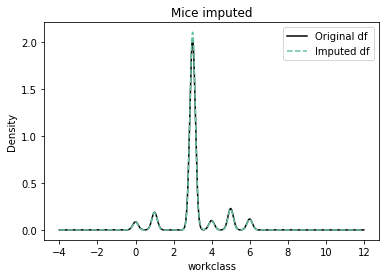

In [160]:
#mice imputer appears to work better 
impute_checker('workclass', mice_train, 'Mice imputed')

In [163]:
#mice imputing barely has an impact on variance
mice_train['workclass'].var(), train['workclass'].var()

(1.230194446913309, 1.3025791283407606)

In [164]:
#mice imputing barely has an impact on variance
mice_train['occupation'].var(), train['occupation'].var()

(15.303926444357263, 16.208670301973843)

In [106]:
X, y = df_adult_train.iloc[:, :-1].values, df_adult_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
### result of creating a new class

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

#perform cross-validaton
n_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.821 (0.009)


In [ ]:
### result of imputing

In [107]:
#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

#perform cross-validaton
n_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.822 (0.008)


In [209]:
X, y = mice_train.iloc[:, :-1].values, mice_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [210]:
#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

#perform cross-validaton
n_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.827 (0.008)


In [3]:
df_adult_train.shape

(32561, 15)

In [4]:
# Drop rows with missing values
df_adult_train = df_adult_train.dropna(how="any", axis=0)
df_adult_train.shape

(30162, 15)

In [6]:
from collections import Counter

# summarize the class distribution
target = df_adult_train.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class: %s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class: >50K, Count=7508, Percentage=24.892%
Class: <=50K, Count=22654, Percentage=75.108%
